### req

In [1]:
# !python -m pip install numpy
# !python -m pip install opencv-python
# !python -m pip install scipy
# !python -m pip install shutils
# # !python -m pip install mat4py
# !python -m pip install matplotlib
!python -m pip install -r requirements.txt

# 1a

In [2]:
import numpy as np
import cv2
# from mat4py import loadmat
import os, shutil
import scipy.io as sio
import matplotlib.pyplot as plt
import ipympl




def load_mat(name: str, scale=1, synth=False):
    mat = sio.loadmat(name)
    
    
    W = mat["W"]*scale
    m = W.shape[1]
    # W_alt = mat["W"]*2
    

    # centroids = W_alt.mean(axis=1).reshape(-1,1)

    # W = np.array(
    #     [np.array([W_alt[i], W_alt[N+i]]) for i in range(N)]
    #     ).reshape(-1,7)

    # W = W_alt
    # centroids = W.mean(axis=1).reshape(-1,1)
    if not synth:
        N = mat["NrFrames"].item()
    
        seq = mat["mexVims"]
        return seq, N, W, m
    
    else:
        X_real = mat["X"]
        return W, X_real



def XXYYtoXYXY(W_alt, N):
    W = np.array(
        [np.array([W_alt[i], W_alt[N+i]]) for i in range(N)]
        ).reshape(-1,7)
    
    return W


def SFM(W):
    centroids = W.mean(axis=1).reshape(-1,1)
    W = W - centroids
    U, S, Vh = np.linalg.svd(W)

    M = np.hstack((
    (S[0] * U[:,0]).reshape(-1,1),
    (S[1] * U[:,1]).reshape(-1,1),
    (S[2] * U[:,2]).reshape(-1,1)
    ))

    X = Vh.T[:,:3].T


    return M, X


def plot3d(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(x,y,z)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()

## imseq1

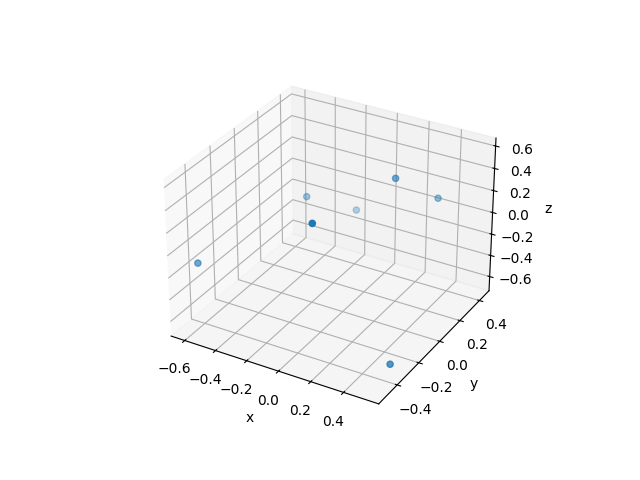

In [3]:
seq, N, W, m = load_mat("HouseTallBasler64.mat")

W = XXYYtoXYXY(W, N)
M,X = SFM(W)

%matplotlib widget
plot3d(X[1,:], X[0,:], X[2,:])


## synthetic

### synth 1

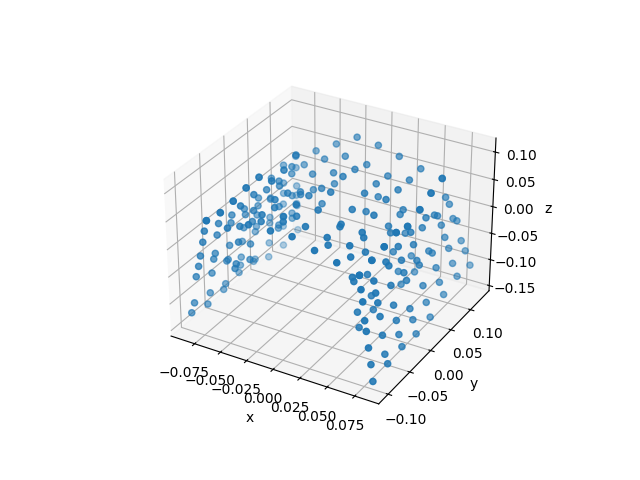

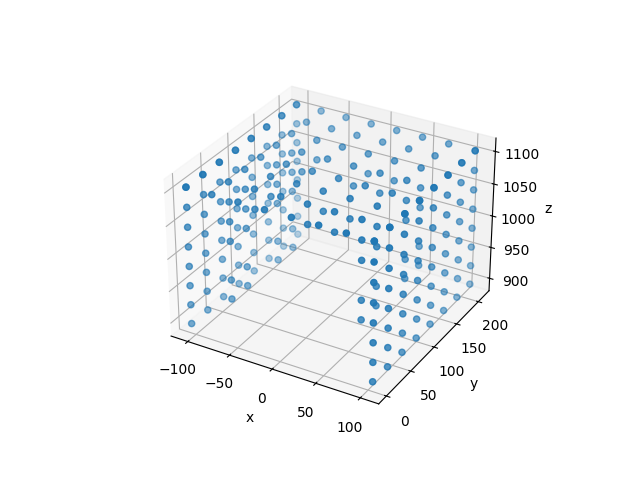

In [4]:
W, X_real = load_mat("affrec1.mat", synth=True)
# W = XXYYtoXYXY(W)

M, X = SFM(W)


plot3d(X[0,:], X[1,:], X[2,:])
plot3d(X_real[0,:]/X_real[3,:], X_real[1,:]/X_real[3,:], X_real[2,:]/X_real[3,:])

### synth 2

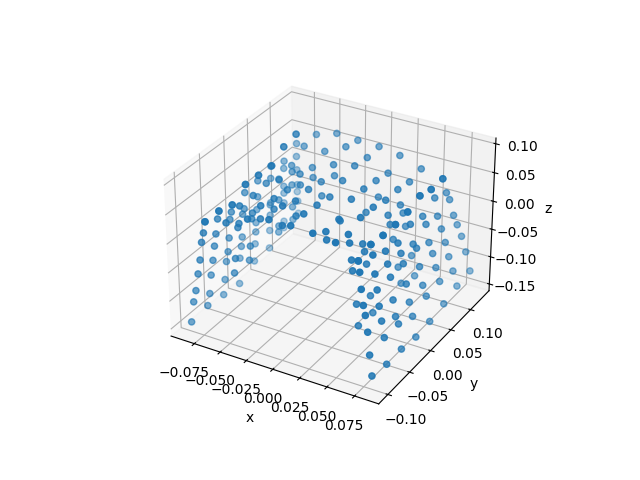

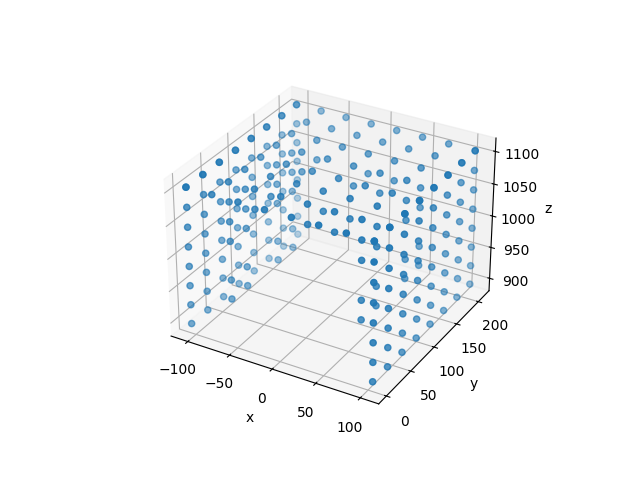

In [5]:
W, X_real = load_mat("affrec3.mat", synth=True)
# W = XXYYtoXYXY(W)

M, X = SFM(W)


plot3d(X[0,:], X[1,:], X[2,:])
plot3d(X_real[0,:]/X_real[3,:], X_real[1,:]/X_real[3,:], X_real[2,:]/X_real[3,:])